# Sociomepy

Sociomepy is a Python package that provides a number of convient functions, data structures, and models for manipulating socio-environmental data. Implementation-wise it is a wrapper around the GeoPandas library and is fully compatitble with all data formats that geopandas accepts.

## Metrics API
The main modeling API in Sociomepy is the "metrics" API. A metric is a spatial function that estimates a socio-environmental metric at a particular latitude an longitude point. For example, one can 
calculate the distance to any park in a city. This is a function over all latitude and longitude pairs. In a sense, metrics smooth out socio-environmental data into functions that we can mathematically manipulate. This is easier to see with an example.

In [1]:
import sys
import os
parent = os.path.abspath('..')
sys.path.append(parent)

As before, we import the sociomedataframe and initialize it with some default data.

In [2]:
from sociomepy.data import SociomeDataFrame

We can initialize this SociomeDataFrame with many different types of data. In this example, we will work with an ArcGIS address file of the City of Chicago. The code below will take a wile to run!

In [3]:
chicago = SociomeDataFrame.from_arcgis_file('../data/chicago-addresses.csv', nrows=10000)

In [4]:
chicago.data.head()

,Lat,Long,ADDRDELIV,Post_Comm,State,Post_Code,LSt_Type,LSt_PreDir,geometry,LOCATIONS
0,41.935796,-87.673357,1763 WEST WELLINGTON AVENUE,CHICAGO,IL,60657,AVE,W,POINT (-87.67336 41.93580),1
1,41.855258,-87.667139,1622 WEST CULLERTON STREET,CHICAGO,IL,60608,ST,W,POINT (-87.66714 41.85526),1
2,41.917926,-87.651651,917 WEST ARMITAGE AVENUE,CHICAGO,IL,60614,AVE,W,POINT (-87.65165 41.91793),1
3,41.525564,-87.695313,20018 MOHAWK TRAIL,OLYMPIA FIELDS,IL,60461,TRL,NaN,POINT (-87.69531 41.52556),1
4,41.525317,-87.695269,20024 MOHAWK TRAIL,OLYMPIA FIELDS,IL,60461,TRL,NaN,POINT (-87.69527 41.52532),1


## Parks Data
We are now going to include an external dataset from the city of chicago that describes the location of parks. Since this data is remote, we will have to use the accessor API (not yet documented).

In [5]:
from sociomepy.accessors import *

parks = SociomeDataFrame.from_json('https://data.cityofchicago.org/resource/2eaw-bdhe.json', access_by_location_dict('location'))


In [6]:
parks.data.head()

,park_name,bowling_green,gymnastic_centers,:@computed_region_43wa_7qmu,band_shell,wheelchair_accessible_ball_fields,boat_slips,volleyball_sand,park_class,alfred_caldwell_lily_pond,...,fitness_courses,track,garden,golf_driving_range,archery_range,:@computed_region_vrxf_vc4k,volleyball,croquet,geometry,LOCATIONS
0,MCKEON (JOSEPH),0,0,48.0,0,0,0,0,MINI-PARK,0,...,0,0,0,0,0,58.0,0,0,POINT (-87.64121 41.82904),1
1,OHIO,0,0,23.0,0,0,0,0,MINI-PARK,0,...,0,0,0,0,0,26.0,0,0,POINT (-87.74325 41.89146),1
2,ALTGELD (JOHN),0,0,23.0,0,0,0,0,COMMUNITY PARK,0,...,0,0,0,0,0,28.0,0,0,POINT (-87.69365 41.87473),1
3,PARK NO. 468,0,0,15.0,0,0,0,0,UNIMPROVED PARK,0,...,0,0,0,0,0,60.0,0,0,POINT (-87.73694 41.79134),1
4,RAINEY (EDWARD),0,0,30.0,0,0,0,0,REGIONAL PARK,0,...,0,0,0,0,0,69.0,1,0,POINT (-87.73073 41.74947),1


The first metric that we will calculate is associating every point in the chicago SociomeDataFrame with the distance to the closest park. This metric is called a SpatialVoronoiFunction. The distance is calculated in meters.

In [7]:
from sociomepy.metrics import SpatialVoronoiFunction

In [8]:
park_distance = SpatialVoronoiFunction(parks)

We can add a metric to a SociomeDataFrame as follows.

In [9]:
chicago.add_metric_to_data(park_distance, 'park_distance')

In [10]:
chicago.data.head()

,Lat,Long,ADDRDELIV,Post_Comm,State,Post_Code,LSt_Type,LSt_PreDir,geometry,LOCATIONS,park_distance
0,41.935796,-87.673357,1763 WEST WELLINGTON AVENUE,CHICAGO,IL,60657,AVE,W,POINT (-87.67336 41.93580),1,140.297568
1,41.855258,-87.667139,1622 WEST CULLERTON STREET,CHICAGO,IL,60608,ST,W,POINT (-87.66714 41.85526),1,444.913353
2,41.917926,-87.651651,917 WEST ARMITAGE AVENUE,CHICAGO,IL,60614,AVE,W,POINT (-87.65165 41.91793),1,293.075281
3,41.525564,-87.695313,20018 MOHAWK TRAIL,OLYMPIA FIELDS,IL,60461,TRL,NaN,POINT (-87.69531 41.52556),1,5116.731700
4,41.525317,-87.695269,20024 MOHAWK TRAIL,OLYMPIA FIELDS,IL,60461,TRL,NaN,POINT (-87.69527 41.52532),1,5112.037761


This addition annotates every point in the city of chicago with a distance in meters to the nearest park. That distance might not be meaningful, and instead we might be interested in the number of parks in a certain radius. This can be done with a SpatialDensityFunction

In [11]:
from sociomepy.metrics import SpatialDensityFunction

In [12]:
park_density = SpatialDensityFunction(parks, radius=1000) #radius measured in meters

In [13]:
chicago.add_metric_to_data(park_density, 'park_density')

In [14]:
chicago.data.head()

,Lat,Long,ADDRDELIV,Post_Comm,State,Post_Code,LSt_Type,LSt_PreDir,geometry,LOCATIONS,park_distance,park_density
0,41.935796,-87.673357,1763 WEST WELLINGTON AVENUE,CHICAGO,IL,60657,AVE,W,POINT (-87.67336 41.93580),1,140.297568,3
1,41.855258,-87.667139,1622 WEST CULLERTON STREET,CHICAGO,IL,60608,ST,W,POINT (-87.66714 41.85526),1,444.913353,2
2,41.917926,-87.651651,917 WEST ARMITAGE AVENUE,CHICAGO,IL,60614,AVE,W,POINT (-87.65165 41.91793),1,293.075281,10
3,41.525564,-87.695313,20018 MOHAWK TRAIL,OLYMPIA FIELDS,IL,60461,TRL,NaN,POINT (-87.69531 41.52556),1,5116.731700,0
4,41.525317,-87.695269,20024 MOHAWK TRAIL,OLYMPIA FIELDS,IL,60461,TRL,NaN,POINT (-87.69527 41.52532),1,5112.037761,0


To compare these two plots, we can visulize them right here.

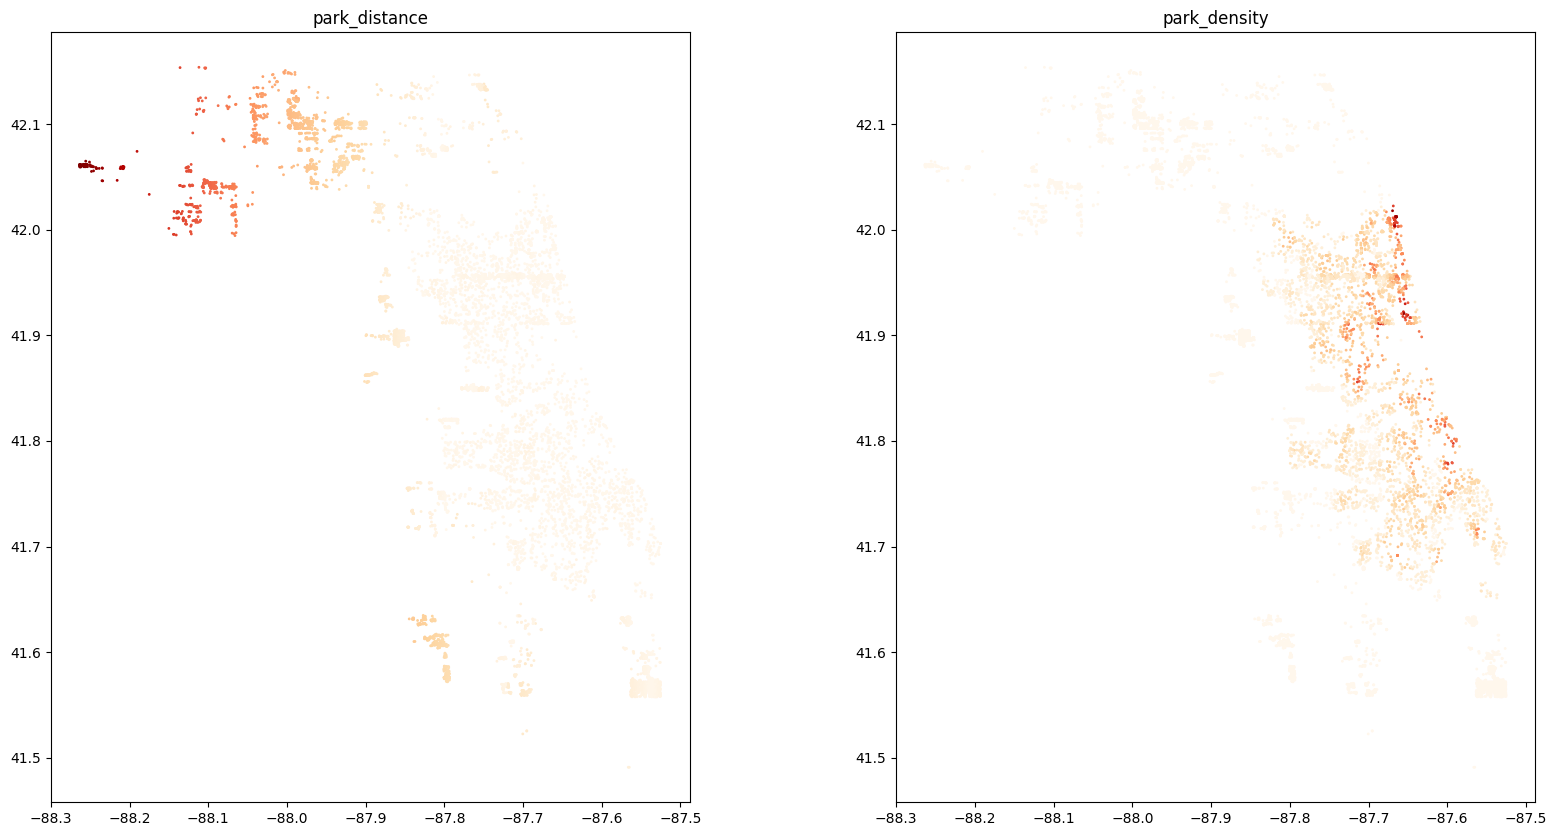

In [15]:
%matplotlib inline
chicago.to_mpl_inline(['park_distance', 'park_density'])

Naturally, we see that there are inversely correlated with each other.

## Sudvision Metrics
In some cases, fine-grained information is not easy to find and the data comes aggregated at different subdivisions. Luckily, we provide the right functionality for including metrics at a subdivision granularity. For example, let's consider income statistics from ACS. We first add the census tract subdivision to the city of chicago data above

In [16]:
acs = SociomeDataFrame.from_save_file('../data/acs')
chicago.add_subdivision(acs, 'tract', 'GEOID')

/Users/sanjaykrishnan/Documents/sociome-data-commons-v2/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


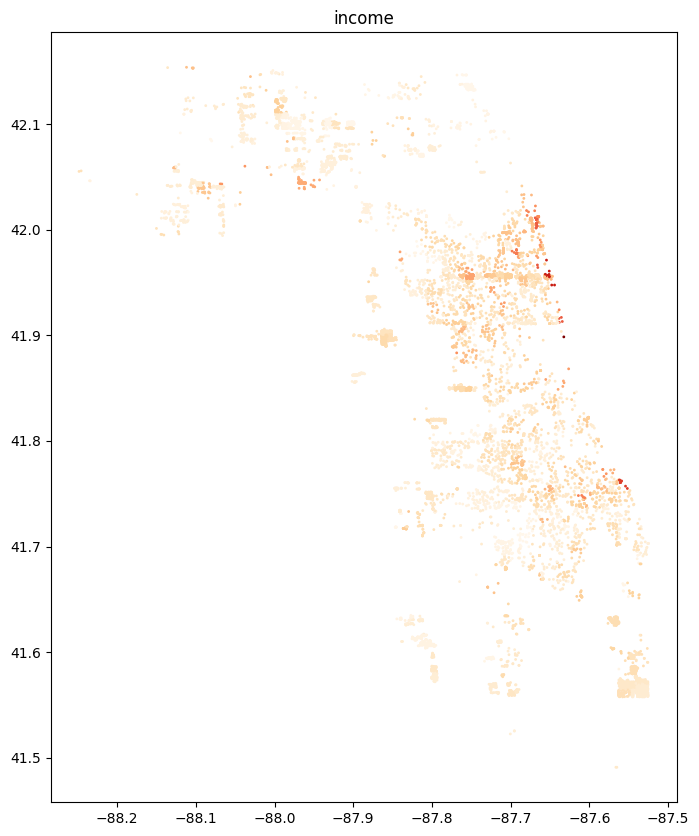

In [20]:
from sociomepy.metrics import SpatialSubdivisionFunction

income = SpatialSubdivisionFunction(acs, 'tract', 'SE_A1006_2', 'GEOID') 
chicago.add_metric_to_data(income, 'income')
chicago.to_mpl_inline(['income'])